# Handwriting Demo

---

## Some links Mr Belser was working through

https://www.tensorflow.org/tutorials/keras/classification

https://aigeekprogrammer.com/keras-python-mnist-handwritten-digit-recognition/

https://www.youtube.com/watch?v=aircAruvnKk

## All imports

In [1]:
import tensorflow as tf
from keras.datasets import mnist
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

2022-03-18 14:23:24.204797: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-18 14:23:24.204819: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


## Do I have any GPUs

In [2]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


2022-03-18 14:23:27.987919: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-03-18 14:23:27.987940: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-03-18 14:23:27.987955: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (6632be3b01a6): /proc/driver/nvidia/version does not exist


## Versions

In [3]:
print("Tensorflow ver :\t" + tf.__version__)
print("Numpy ver :\t\t" + np.__version__)
print("matplotlib :\t\t" + matplotlib.__version__)

Tensorflow ver :	2.7.0
Numpy ver :		1.17.4
matplotlib :		3.1.2


## Read in the data

## Describe

- X is the image
- y is the label

In [4]:
(train_X, train_y), (test_X, test_y) = mnist.load_data()

## What is the shape of the data

- `train_X` contains all 60000 of the 28x28 images 
- `train_Y` contains all 60000 clasifications of those `train_X` images 
- `test_X` contains all 10000 reserved 28x28 images for testing
- `test_Y` contains all 10000 reserved clasifications of those `test_X` images 

In [5]:
print('train_X:\t' + str(train_X.shape))
print('train_y:\t' + str(train_y.shape))
print('test_X:\t\t'  + str(test_X.shape))
print('test_y:\t\t'  + str(test_y.shape))

train_X:	(60000, 28, 28)
train_y:	(60000,)
test_X:		(10000, 28, 28)
test_y:		(10000,)


## What does an image look like?

- Data
- Display

### What do the data look like for one image

In [6]:
# print(train_X[0])

### The classifications

In [8]:
for n in range(n_show):
  print("Image " + str(n) + " is classified as a " + str(train_y[n]))

Image 0 is classified as a 5
Image 1 is classified as a 0
Image 2 is classified as a 4
Image 3 is classified as a 1
Image 4 is classified as a 9
Image 5 is classified as a 2
Image 6 is classified as a 1


## Prepare the data for training

Need to convert the data to a domain of 0->1

In [9]:
train_X = train_X /255
test_X = test_X / 255

In [10]:
# train_X[0]

## Show a grid of images with label

### The function to _graph it_

In [12]:
def graphit(images, labels, rows=1, cols=1, start=0, zoom=2):
  n_images = rows * cols
  fig, ax = plt.subplots(rows,cols,figsize=(cols * zoom, rows * zoom))
  for n in range(n_images):
    plt.subplot(rows, cols, n+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(images[n+start], cmap=plt.cm.binary)
    # plt.imshow(images[n])
    plt.xlabel("[" + str(n+start) + "] is a : " + str(labels[n+start]))
  plt.show()


### Now set the parameters

- image array
- label array
- rows
- columns
- zoom parameter

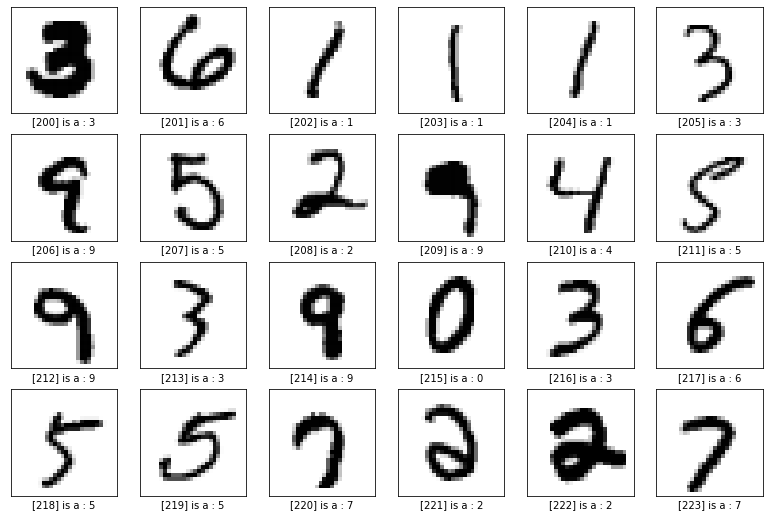

In [13]:
graphit(test_X, test_y,4,6, 200, zoom=2.25)

# Can I get a model to work?

### Attempted model from the 3 blue 1 brown video

https://www.youtube.com/watch?v=aircAruvnKk

In [14]:
## Uncomment to use it
#
# https://www.youtube.com/watch?v=aircAruvnKk
#

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(10)
])


2022-03-18 14:24:43.823935: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [15]:
# Display the model's architecture
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 16)                2064      
                                                                 
 dense_2 (Dense)             (None, 10)                170       
                                                                 
Total params: 102,714
Trainable params: 102,714
Non-trainable params: 0
_________________________________________________________________


### Compile the model

In [16]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


### Train

In [17]:
# model.fit(train_X, train_y, epochs=10)
history = model.fit(train_X, train_y, epochs=10, batch_size=64)


Epoch 1/10
938/938 [==============================] - 1s 847us/step - loss: 0.3264 - accuracy: 0.9056
Epoch 2/10
938/938 [==============================] - 1s 846us/step - loss: 0.1318 - accuracy: 0.9611
Epoch 3/10
938/938 [==============================] - 1s 841us/step - loss: 0.0937 - accuracy: 0.9720
Epoch 4/10
938/938 [==============================] - 1s 844us/step - loss: 0.0720 - accuracy: 0.9783
Epoch 5/10
938/938 [==============================] - 1s 837us/step - loss: 0.0575 - accuracy: 0.9825
Epoch 6/10
938/938 [==============================] - 1s 845us/step - loss: 0.0465 - accuracy: 0.9856
Epoch 7/10
938/938 [==============================] - 1s 833us/step - loss: 0.0388 - accuracy: 0.9879
Epoch 8/10
938/938 [==============================] - 1s 841us/step - loss: 0.0317 - accuracy: 0.9906
Epoch 9/10
938/938 [==============================] - 1s 846us/step - loss: 0.0261 - accuracy: 0.9920
Epoch 10/10
938/938 [==============================] - 1s 844us/step - loss: 0.023

## look at history

looks like a dict

In [18]:
print(history.history)

{'loss': [0.3264037072658539, 0.13179399073123932, 0.09366566687822342, 0.07204461842775345, 0.05750330165028572, 0.04647577553987503, 0.03878604993224144, 0.031657811254262924, 0.026124440133571625, 0.023365110158920288], 'accuracy': [0.9055666923522949, 0.9611333608627319, 0.9720333218574524, 0.9782833456993103, 0.9825166463851929, 0.9855666756629944, 0.9878833293914795, 0.9905666708946228, 0.9920333623886108, 0.9925833344459534]}


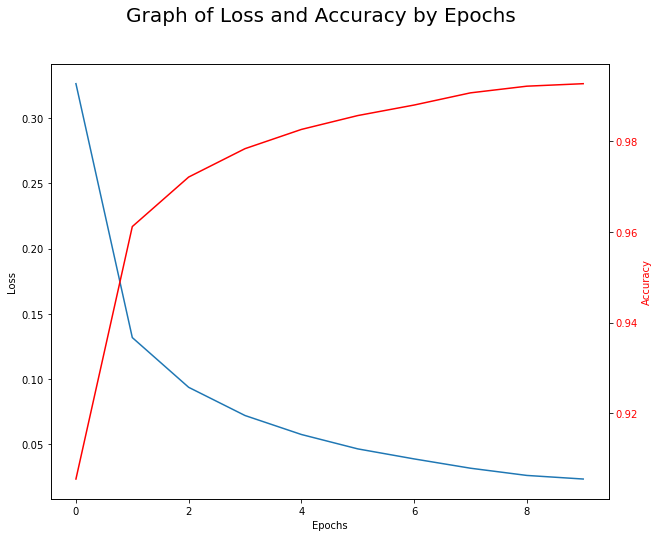

In [21]:
# list the number of epoch from the history objec
x_values = np.arange(len(history.history['loss']))

fig, ax1 = plt.subplots(figsize=(10,8)) 
fig.suptitle("Graph of Loss and Accuracy by Epochs", fontsize=20)
  
ax1.set_xlabel('Epochs') 
ax1.set_ylabel('Loss', color = 'black') 
plot_1 = ax1.plot(x_values,history.history['loss'])
ax1.tick_params(axis ='y', labelcolor = 'black') 

# Adding Twin Axes
ax2 = ax1.twinx() 
  
ax2.set_ylabel('Accuracy', color = 'red') 
plot_2 = ax2.plot(x_values,history.history['accuracy'], color='red')
ax2.tick_params(axis ='y', labelcolor = 'red') 

# Show plot

plt.show()

---

## Evaluate the Model

### Test data that is still 28x28 images

In [22]:
test_loss, test_acc = model.evaluate(test_X,  test_y, verbose=1)

print('\nTest accuracy:', test_acc)

313/313 [==============================] - 0s 706us/step - loss: 0.1238 - accuracy: 0.9695

Test accuracy: 0.9695000052452087


---

# Predictions

### 28x28 images....

In [23]:
predictions = model.predict(test_X[0:100])

### flat images

In [25]:
predictions[0]

array([ -6.726437 ,  -2.4310308,  -3.4214337,   2.0201807, -14.980846 ,
        -3.1328788, -10.948587 ,  12.518365 ,  -5.5049367,  -3.4071188],
      dtype=float32)

---

## Need a list of incorrect predictions

Look through the 100 predictions find where label is not the prediction

In [26]:
wrong = []
for i in range(len(predictions)):
    print(np.argmax(predictions[i]),test_y[i])

7 7
2 2
1 1
0 0
4 4
1 1
4 4
9 9
6 5
9 9
0 0
6 6
9 9
0 0
1 1
5 5
9 9
7 7
8 3
4 4
9 9
6 6
6 6
5 5
4 4
0 0
7 7
4 4
0 0
1 1
3 3
1 1
3 3
4 4
7 7
2 2
7 7
1 1
2 2
1 1
1 1
7 7
4 4
2 2
3 3
5 5
1 1
2 2
4 4
4 4
6 6
3 3
5 5
5 5
6 6
0 0
4 4
1 1
9 9
5 5
7 7
8 8
9 9
3 3
7 7
4 4
6 6
4 4
3 3
0 0
7 7
0 0
2 2
9 9
1 1
7 7
3 3
2 2
9 9
7 7
7 7
6 6
2 2
7 7
8 8
4 4
7 7
3 3
6 6
1 1
3 3
6 6
9 9
3 3
1 1
4 4
1 1
7 7
6 6
9 9


## Well - the first 100 are correct

So - we need to look more....

In [29]:
all_predictions = model.predict(test_X)

## Find all of the wrong classifications

In [30]:
wrong = []
for i in range(len(test_X)):
    predict = np.argmax(all_predictions[i])
    label = test_y[i]
    if(predict != label):
        # print("Found index[" + str(i) + "] to have prediction " + str(predict) + " and a label of " + str(label))
        wrong.append(i)

In [31]:
print(wrong)

[8, 18, 104, 151, 193, 241, 247, 264, 321, 340, 359, 394, 448, 479, 495, 582, 583, 619, 659, 691, 720, 813, 874, 900, 951, 956, 1003, 1014, 1039, 1107, 1112, 1114, 1156, 1178, 1182, 1192, 1226, 1232, 1242, 1247, 1272, 1281, 1289, 1299, 1319, 1326, 1328, 1356, 1378, 1393, 1395, 1522, 1527, 1530, 1549, 1553, 1621, 1641, 1681, 1709, 1751, 1754, 1790, 1901, 1913, 1941, 1952, 2016, 2018, 2035, 2043, 2068, 2109, 2118, 2129, 2162, 2182, 2185, 2189, 2224, 2237, 2266, 2280, 2291, 2292, 2293, 2299, 2329, 2333, 2369, 2387, 2406, 2414, 2426, 2454, 2488, 2526, 2573, 2582, 2597, 2607, 2635, 2648, 2654, 2670, 2720, 2743, 2760, 2769, 2810, 2845, 2854, 2863, 2915, 2921, 2939, 2979, 2995, 3005, 3060, 3073, 3117, 3225, 3240, 3441, 3503, 3520, 3558, 3565, 3567, 3575, 3597, 3776, 3780, 3796, 3808, 3818, 3821, 3838, 3850, 3853, 3869, 3893, 3902, 3906, 3926, 3941, 3943, 3946, 3950, 3962, 3970, 3985, 4000, 4065, 4078, 4154, 4156, 4163, 4174, 4201, 4224, 4248, 4255, 4259, 4271, 4289, 4294, 4314, 4315, 4321, 43

---

## Now let's see what we missed

## A simple mockup of the final graph

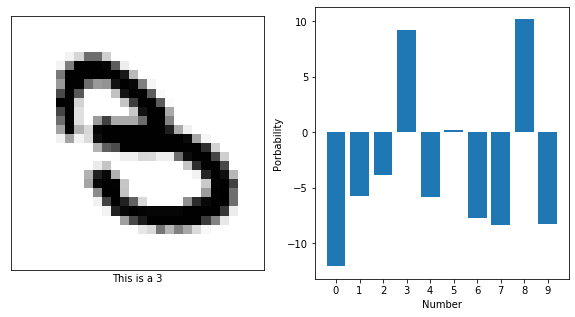

In [32]:
observation = 18
nums = [0,1,2,3,4,5,6,7,8,9]

fig, ax = plt.subplots(1,2, figsize=(10,5))
ax[0].imshow(test_X[observation], cmap=plt.cm.binary)
ax[0].grid(False)
ax[0].set_xticks([])
ax[0].set_yticks([])
ax[0].set_xlabel('This is a ' + str(test_y[observation]))
ax[1].bar(nums,all_predictions[observation])
ax[1].set_xticks(nums)
ax[1].set_xlabel('Number')
ax[1].set_ylabel('Porbability')
plt.show()


In [57]:
def plot_classified_image(ax, img, label, classification):
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(img, cmap=plt.cm.binary)
    predicted = np.argmax(classification)
    if predicted == label:
        color = 'black'
    else:
        color = 'r'

    plt.xlabel("Predicted : {}  Confidence : {:2.0f}  Actual : {}".format(predicted, np.max(classification), label), color=color)
    # plt.xlabel("[zzzzz]")
    return ax

In [52]:
# may need to fix this when we have labels for the category names
def plot_prediction(ax, label, prediction):
    number_of_classes = len(prediction)
    x_values = np.arange(number_of_classes)
    predicted = np.argmax(prediction)
    ax.bar(x_values,prediction, alpha=0.75)
    ax.bar(predicted, prediction[predicted], color='r', label='prediction')
    ax.bar(label,prediction[label], color='g', label='actual')
    ax.set_xticks(x_values)
    ax.set_xlabel('Number')
    ax.set_ylabel('Porbability')
    ax.legend()

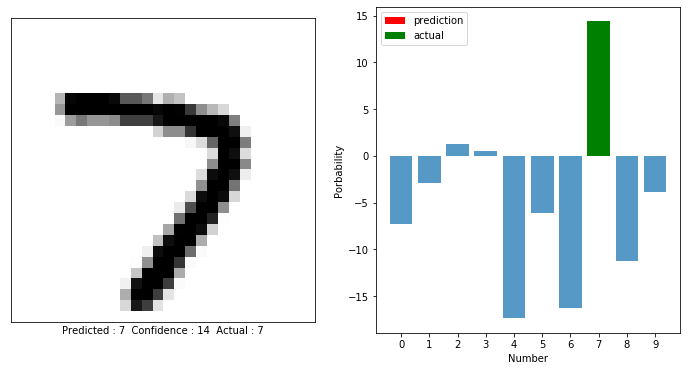

In [58]:
obs = 17

fig, ax = plt.subplots(1,2, figsize=(12,6))
plot_classified_image(plt.subplot(1,2,1), test_X[obs], test_y[obs], all_predictions[obs])
plot_prediction(plt.subplot(1,2,2), test_y[obs], all_predictions[obs])
plt.show()

In [82]:
def graph_predictions(images, labels, predictions, rows=1, cols=1, start=0, zoom=2):
    n_plots = rows * cols * 2
    fig, ax = plt.subplots(rows,cols * 2,figsize=(cols * 2 * zoom, rows * zoom))
    plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
    for n in range(n_plots):
        #plt.subplot(rows, cols * 2, n+1)
        img_index = (n // 2) + start
        if((n%2)==0):
            plot_classified_image(plt.subplot(rows, cols * 2, n+1), images[img_index], labels[img_index], predictions[img_index])
        else:
            plot_prediction(plt.subplot(rows, cols * 2, n+1), labels[img_index], predictions[img_index])
    plt.show()

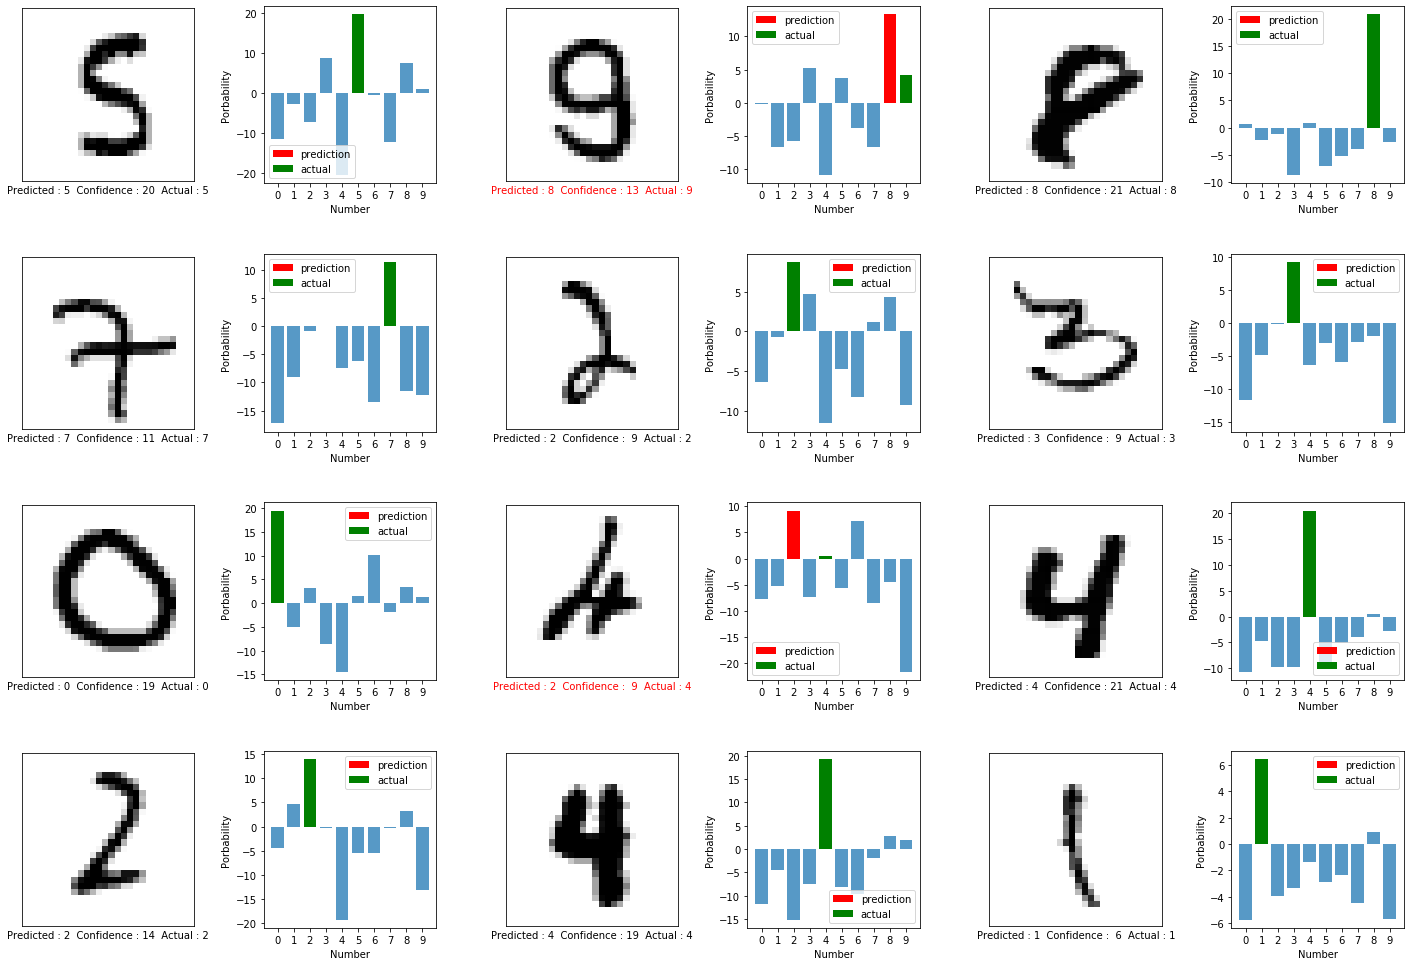

In [83]:
graph_predictions(test_X, test_y, all_predictions, start=240, rows=4, cols=3, zoom=4)

## Save the Model

In [ ]:
model.save('HandWriting_model.h5')